In [27]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

resize image up / down to a size needed, walaupun put the desination size (both dimensions)  or the scaling (in both dimensions)


robust way :

- find the aspect ratio and calulate -> smaller dimension
- ketika satunya lebih besar peregangan 1000.

# Note :

- jika aspect > 1 -> horizontal
- jika aspect < 1 -> vertical

interpolasi method tergantung pada apaun image yang di reganggakan untuk resolusinya diperbesar atau di scaling down untuk lower reolusi.

# after reisizing

- kita bisa akhiri dengan 1k x N image (dimana N <=1k) 
-  need to pad (basic pad) apapun background warna yang di butuhkan pada dua sisi untuk mengisikan image ke dalam 1k x 1k => copyMakeBorder()/ np.pad()

memutuskan apapun tentang case odd number dari pixel yang dibutuhkan untuk ditambhkan untuk membuat 1k x 1k (penambahan pixel ke kiri atau ke kanan base on pad or atas atau bawah base on pad) -> semuanya berdasarkan orienasinya

# automatic calucalte aspect ratio and scales yang sesuai, pad yang dipelukan

In [18]:
def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # Metode interpolation (penambahan) 
    if h > sh or w > sw: # Penyusutan image
        interp = cv2.INTER_AREA
    else: # Peregangan image
        interp = cv2.INTER_CUBIC

    # aspect ratio dari  image
    aspect = w/h  # convert to sebuah ratio float(w)/h

    # compute scaling image dan pad base size 
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) == 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image => only 1 color yang tersedia
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img

v_img = cv2.imread('v.jpg') # vertical image
scaled_v_img = resizeAndPad(v_img, (200,200), 127)

h_img = cv2.imread('h.jpg') # horizontal image
scaled_h_img = resizeAndPad(h_img, (200,200), 127)

sq_img = cv2.imread('sq.jpg') # square image
scaled_sq_img = resizeAndPad(sq_img, (200,200), 127)

In [19]:
cv2.imshow("image",scaled_v_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
cv2.imshow("image",scaled_h_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
cv2.imshow("image",scaled_sq_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Using open cv2 full

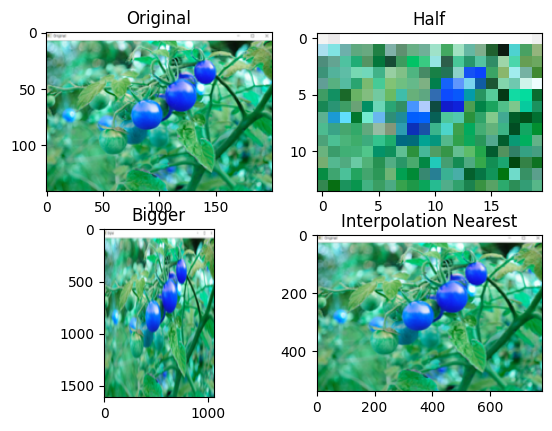

In [31]:
image = cv2.imread("TOMATO1.png")
half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1610))
 
stretch_near = cv2.resize(image, (780, 540),
               interpolation = cv2.INTER_NEAREST)
 
 
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4

for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
 
plt.show()